In [4]:
from data_import_and_preprocessing.dataset_formation import DataParser, ImageDataExtractor, LabelExtractor, DataSetCreator
import matplotlib.pyplot as plt

In [5]:
class FakeImageDataExtractor(ImageDataExtractor):
    def get_data(self, data_point):
        return None

class SimplifiedLabelExtractor(LabelExtractor):
    def extract_label(self, metadata):
        label_int = metadata['labels']['animal']['value']
        return label_int

In [6]:
data_dir = '../data'
data_parser = DataParser(data_dir)
image_data_extractor = FakeImageDataExtractor(None)
label_extractor = SimplifiedLabelExtractor(no_classes=3)
only_labels_dataset = DataSetCreator(data_parser, image_data_extractor, label_extractor)
labels = []
for _, label in only_labels_dataset.get_data_point_generator():
    labels.append(label)

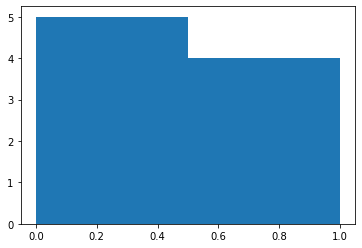

In [9]:
plt.hist(labels, bins=2)
plt.show()

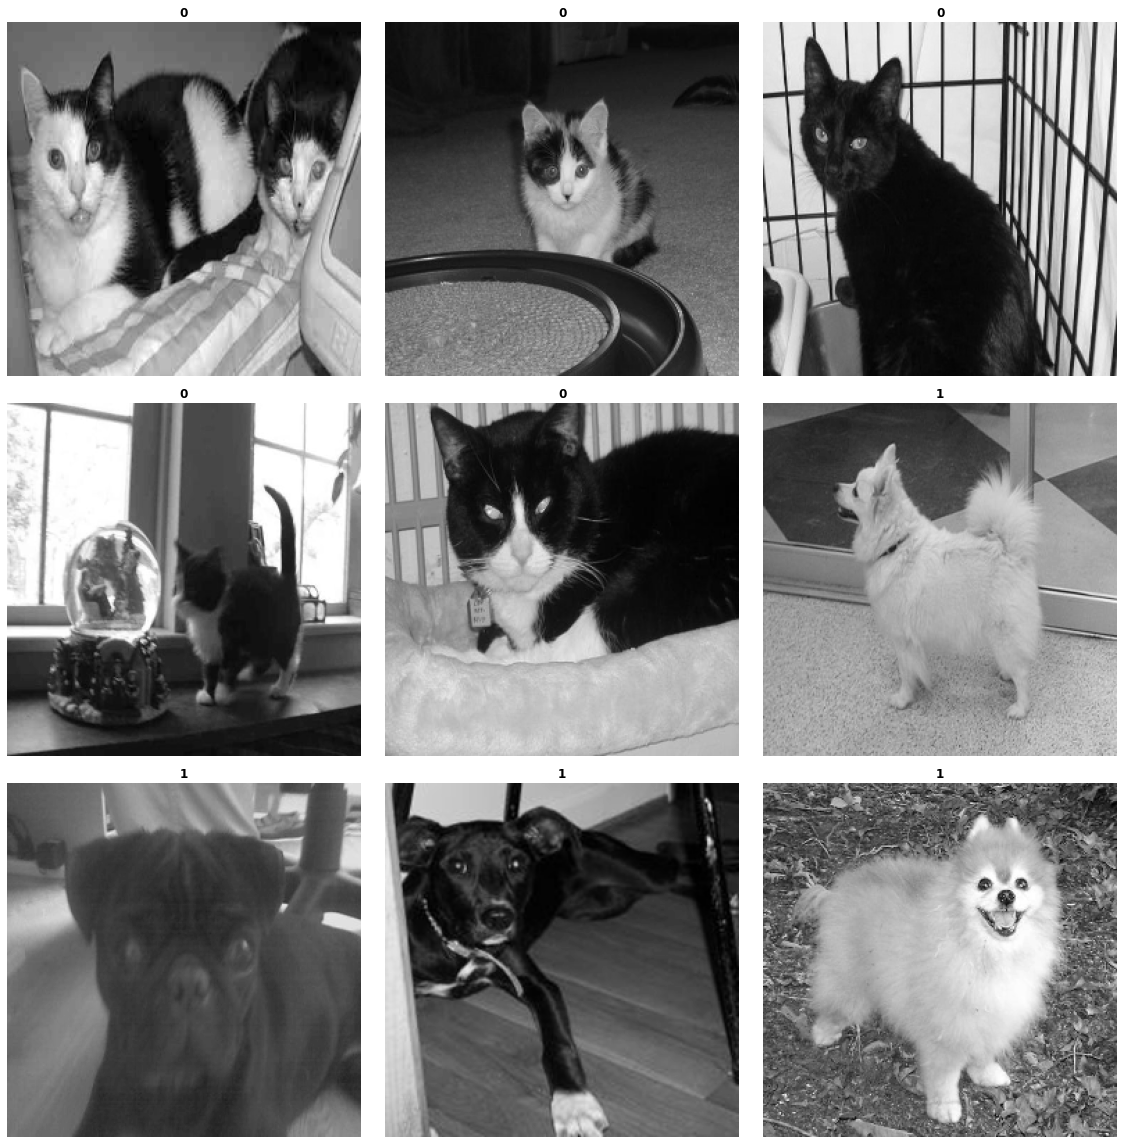

In [8]:
image_data_extractor = ImageDataExtractor((255,255))
label_extractor = SimplifiedLabelExtractor(no_classes=3)
dataset = DataSetCreator(data_parser, image_data_extractor, label_extractor)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
axs = axs.flatten()

labels = [0, 0, 0, 0, 0, 1, 1, 1, 1]
images = []

no = 0
for point_image, point_label in dataset.get_data_point_generator():
    #print(f'{no}: label is {point_label}')
    if point_label is labels[no]:
        images.append(point_image)
        no += 1
        if no == 9:
            break

for label, image, ax in zip(labels, images, axs):
    ax.imshow(image, cmap='gray', vmin=0, vmax=1)
    font_axis_publish = {
          'color':  'black',
          'weight': 'bold',
          'size': 12,
    }
    ax.axis('off')
    ax.set_title(str(label), fontdict=font_axis_publish)

plt.tight_layout()